In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Dropout
import joblib

2024-04-26 07:04:07.959495: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-26 07:04:07.959841: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 07:04:07.964148: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 07:04:07.997224: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 07:04:08.958574: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
df = pd.read_csv("ObesityDataSet.csv")
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
cat_features = df.select_dtypes(include = ['object'])
cat_features.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [4]:
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [5]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


train score: 0.9884901642799377
test score: 0.9463722109794617


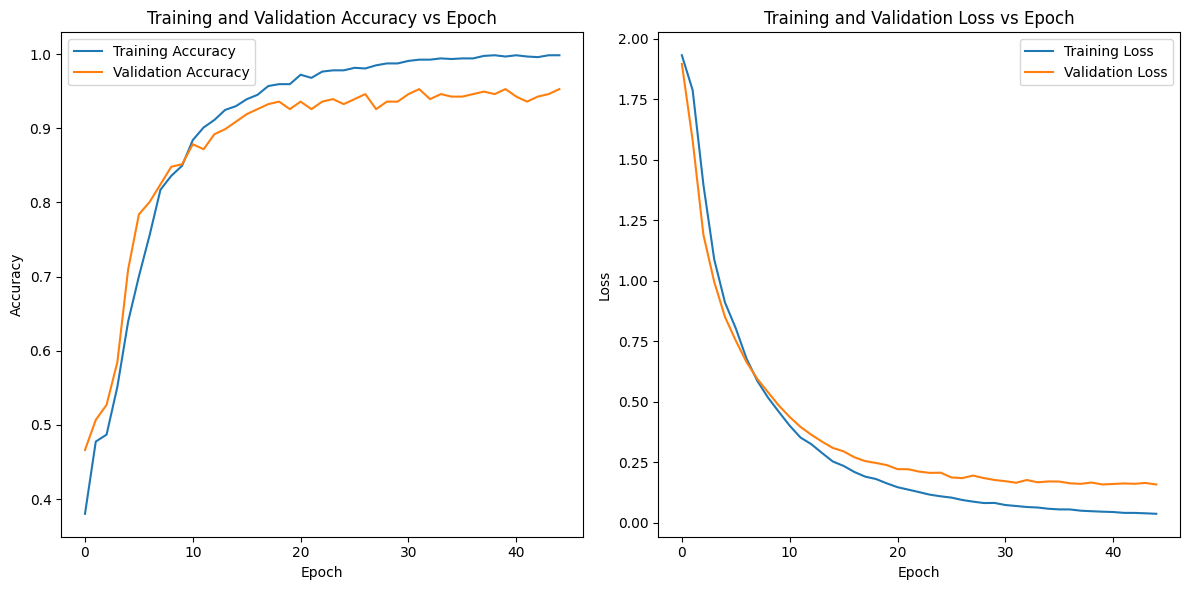

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_ANN = Sequential()
model_ANN.add(Dense(64, kernel_initializer='uniform', activation='relu', input_shape=(X_train.shape[1],)))
# model_ANN.add(Dropout(0.1))
model_ANN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
# model_ANN.add(Dropout(0.1))
model_ANN.add(Dense(7, kernel_initializer='uniform', activation='softmax'))

model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_ANN.fit(X_train_scaled, y_train, epochs=45, batch_size=45, verbose=0, validation_split=0.2)

train_score = model_ANN.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Accuracy is at index 1
test_score = model_ANN.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Accuracy is at index 1

print("train score: " + str(train_score))
print("test score: " + str(test_score))

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()

/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


train score: 0.9884901642799377
test score: 0.9558359384536743


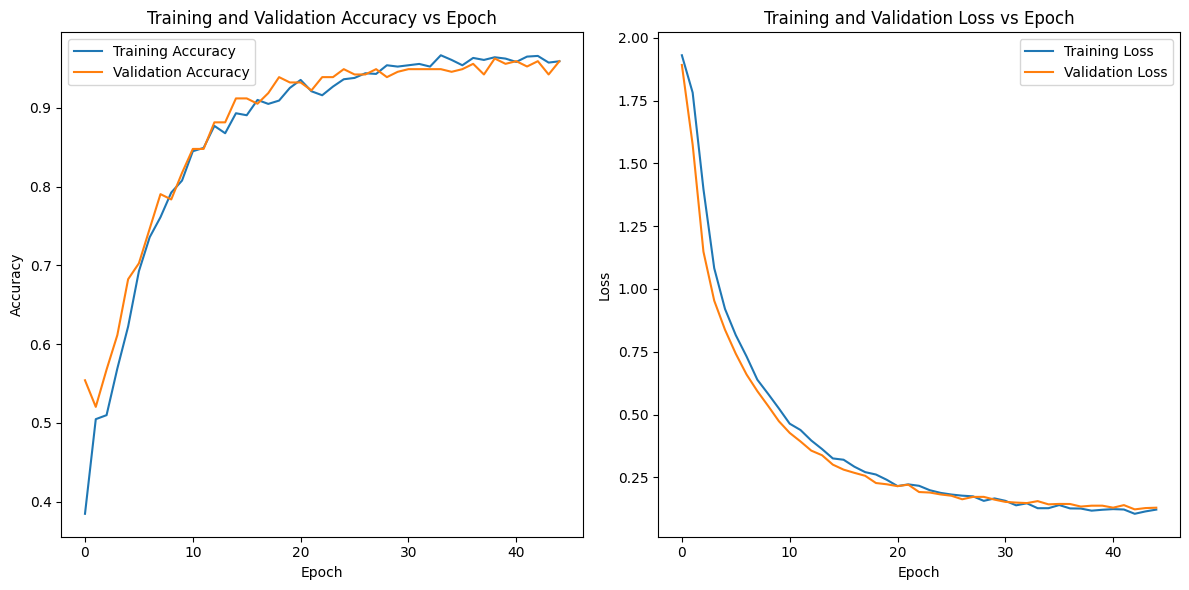

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_ANN = Sequential()
model_ANN.add(Dense(64, kernel_initializer='uniform', activation='relu', input_shape=(X_train.shape[1],)))
model_ANN.add(Dropout(0.1))
model_ANN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model_ANN.add(Dropout(0.1))
model_ANN.add(Dense(7, kernel_initializer='uniform', activation='softmax'))

model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_ANN.fit(X_train_scaled, y_train, epochs=45, batch_size=45, verbose=0, validation_split=0.2)

train_score = model_ANN.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Accuracy is at index 1
test_score = model_ANN.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Accuracy is at index 1

print("train score: " + str(train_score))
print("test score: " + str(test_score))

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()

/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


train score: 0.9620853066444397
test score: 0.9179810881614685


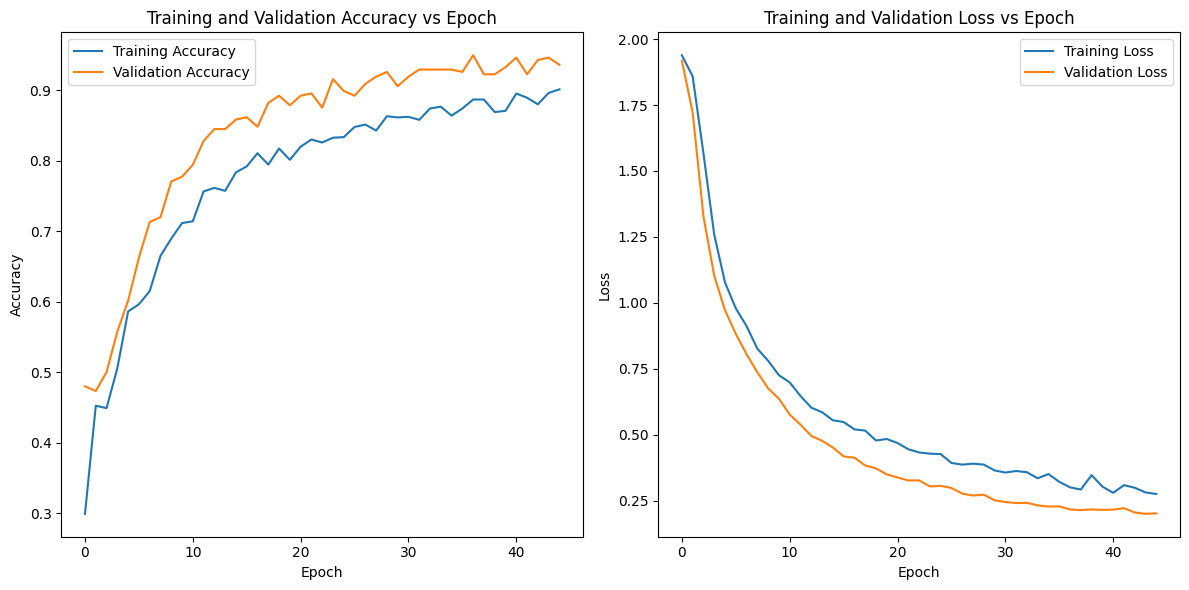

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_ANN = Sequential()
model_ANN.add(Dense(64, kernel_initializer='uniform', activation='relu', input_shape=(X_train.shape[1],)))
model_ANN.add(Dropout(0.4))
model_ANN.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model_ANN.add(Dropout(0.4))
model_ANN.add(Dense(7, kernel_initializer='uniform', activation='softmax'))

model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_ANN.fit(X_train_scaled, y_train, epochs=45, batch_size=45, verbose=0, validation_split=0.2)

train_score = model_ANN.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Accuracy is at index 1
test_score = model_ANN.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Accuracy is at index 1

print("train score: " + str(train_score))
print("test score: " + str(test_score))

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities for training and test set
y_pred_train_probs = model_ANN.predict(X_train_scaled)
y_pred_test_probs = model_ANN.predict(X_test_scaled)

# Convert probabilities to class labels by selecting the class with the highest probability
y_pred_train = np.argmax(y_pred_train_probs, axis=1)
y_pred_test = np.argmax(y_pred_test_probs, axis=1)

# Calculate classification report for training set
report_train = classification_report(y_train, y_pred_train)

# Calculate classification report for test set
report_test = classification_report(y_test, y_pred_test)

print("Classification Report for Training Set:")
print(report_train)

print("\nClassification Report for Test Set:")
print(report_test)

 1/47 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       194
           1       0.96      0.90      0.93       215
           2       0.99      0.99      0.99       246
           3       1.00      1.00      1.00       203
           4       1.00      1.00      1.00       224
           5       0.88      0.96      0.92       188
           6       0.97      0.90      0.94       207

    accuracy                           0.96      1477
   macro avg       0.96      0.96      0.96      1477
weighted avg       0.96      0.96      0.96      1477


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        78
           1       0.77      0.75      0.76        72
           2       0.98      0.96      0.97       105
           3       0.98      

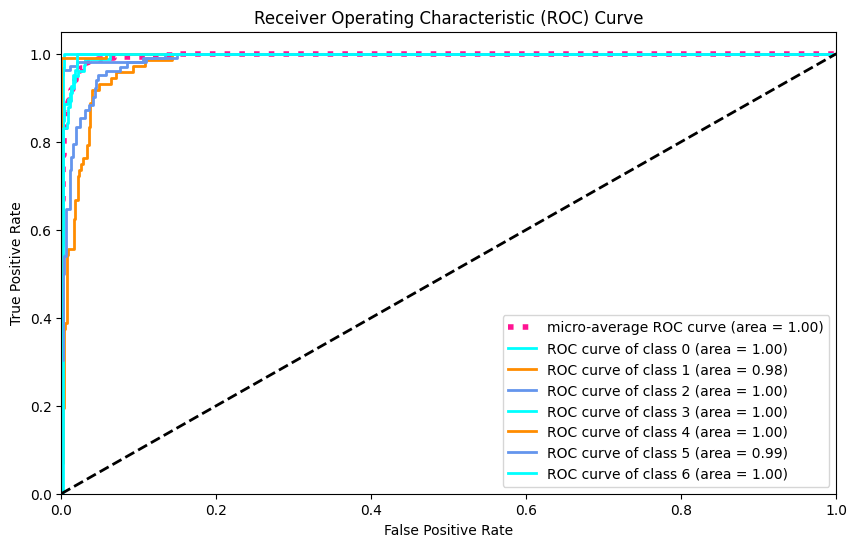

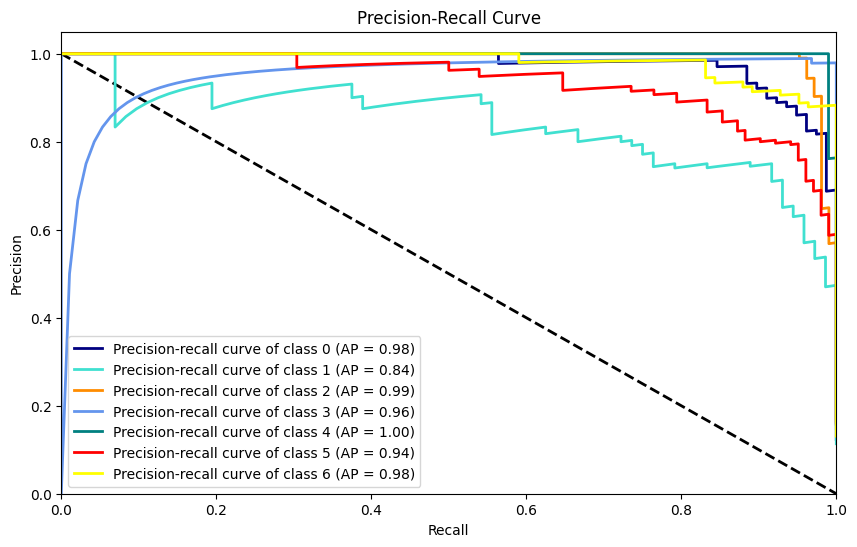

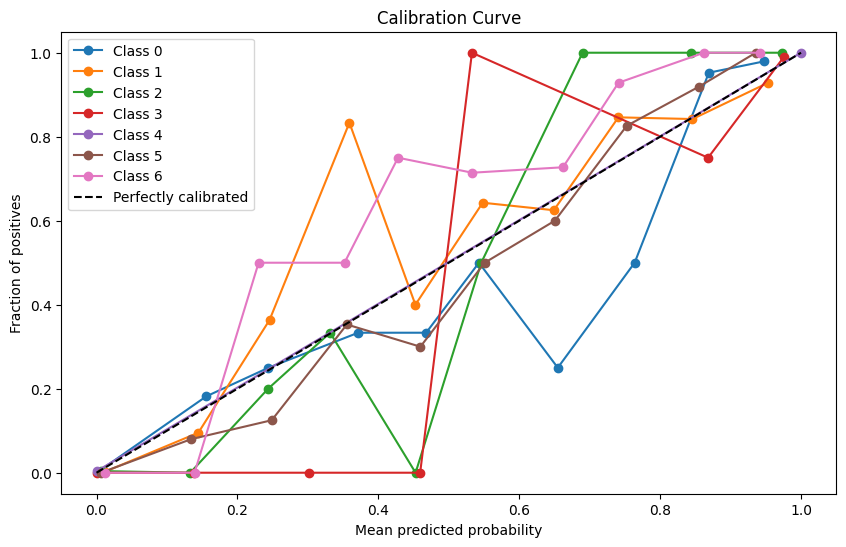

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_roc_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probabilities[:, i])
        roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_probabilities[:, i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_probabilities.ravel())
    roc_auc["micro"] = roc_auc_score(y_true_bin, y_probabilities, average="micro")

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Compute precision-recall curve and average precision for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_probabilities[:, i])
        average_precision[i] = average_precision_score(y_true_bin[:, i], y_probabilities[:, i])

    # Plot precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.plot([0, 1], [1, 0], 'k--', lw=2)
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label='Precision-recall curve of class {0} (AP = {1:0.2f})'
                 ''.format(i, average_precision[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

def plot_calibration_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Plot calibration curve
    plt.figure(figsize=(10, 6))
    for i in range(n_classes):
        prob_true, prob_pred = calibration_curve(y_true_bin[:, i], y_probabilities[:, i], n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label=f'Class {i}')
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.title('Calibration Curve')
    plt.legend()
    plt.show()

# # Assuming you have your classifier clf, test features X_test, and true labels y_test
# y_probabilities = clf.predict_proba(X_test)
# y_pred = clf.predict(X_test)

# Assuming n_classes is the number of classes in your classification problem
n_classes = 7
plot_roc_curve(y_test, y_pred_test_probs, n_classes)
plot_precision_recall_curve(y_test, y_pred_test_probs, n_classes)
plot_calibration_curve(y_test, y_pred_test_probs, n_classes)

